In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import *

In [2]:
x = Input(shape= (3, ))

hidden1 = Dense(128, activation= 'relu')(x)
hidden2 = Dense(64, activation= 'relu')(hidden1)

output1 = Dense(1, activation= 'linear')(hidden2)
output2 = Dense(1, activation= 'sigmoid')(hidden2)


In [3]:
model = Model(inputs= x, outputs= [output1, output2])

In [4]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 3)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │        512 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         65 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,898 (34.76 KB)

 Trainable params: 8,898 (34.76 KB)

 Non-trainable params: 0 (0.00 B)

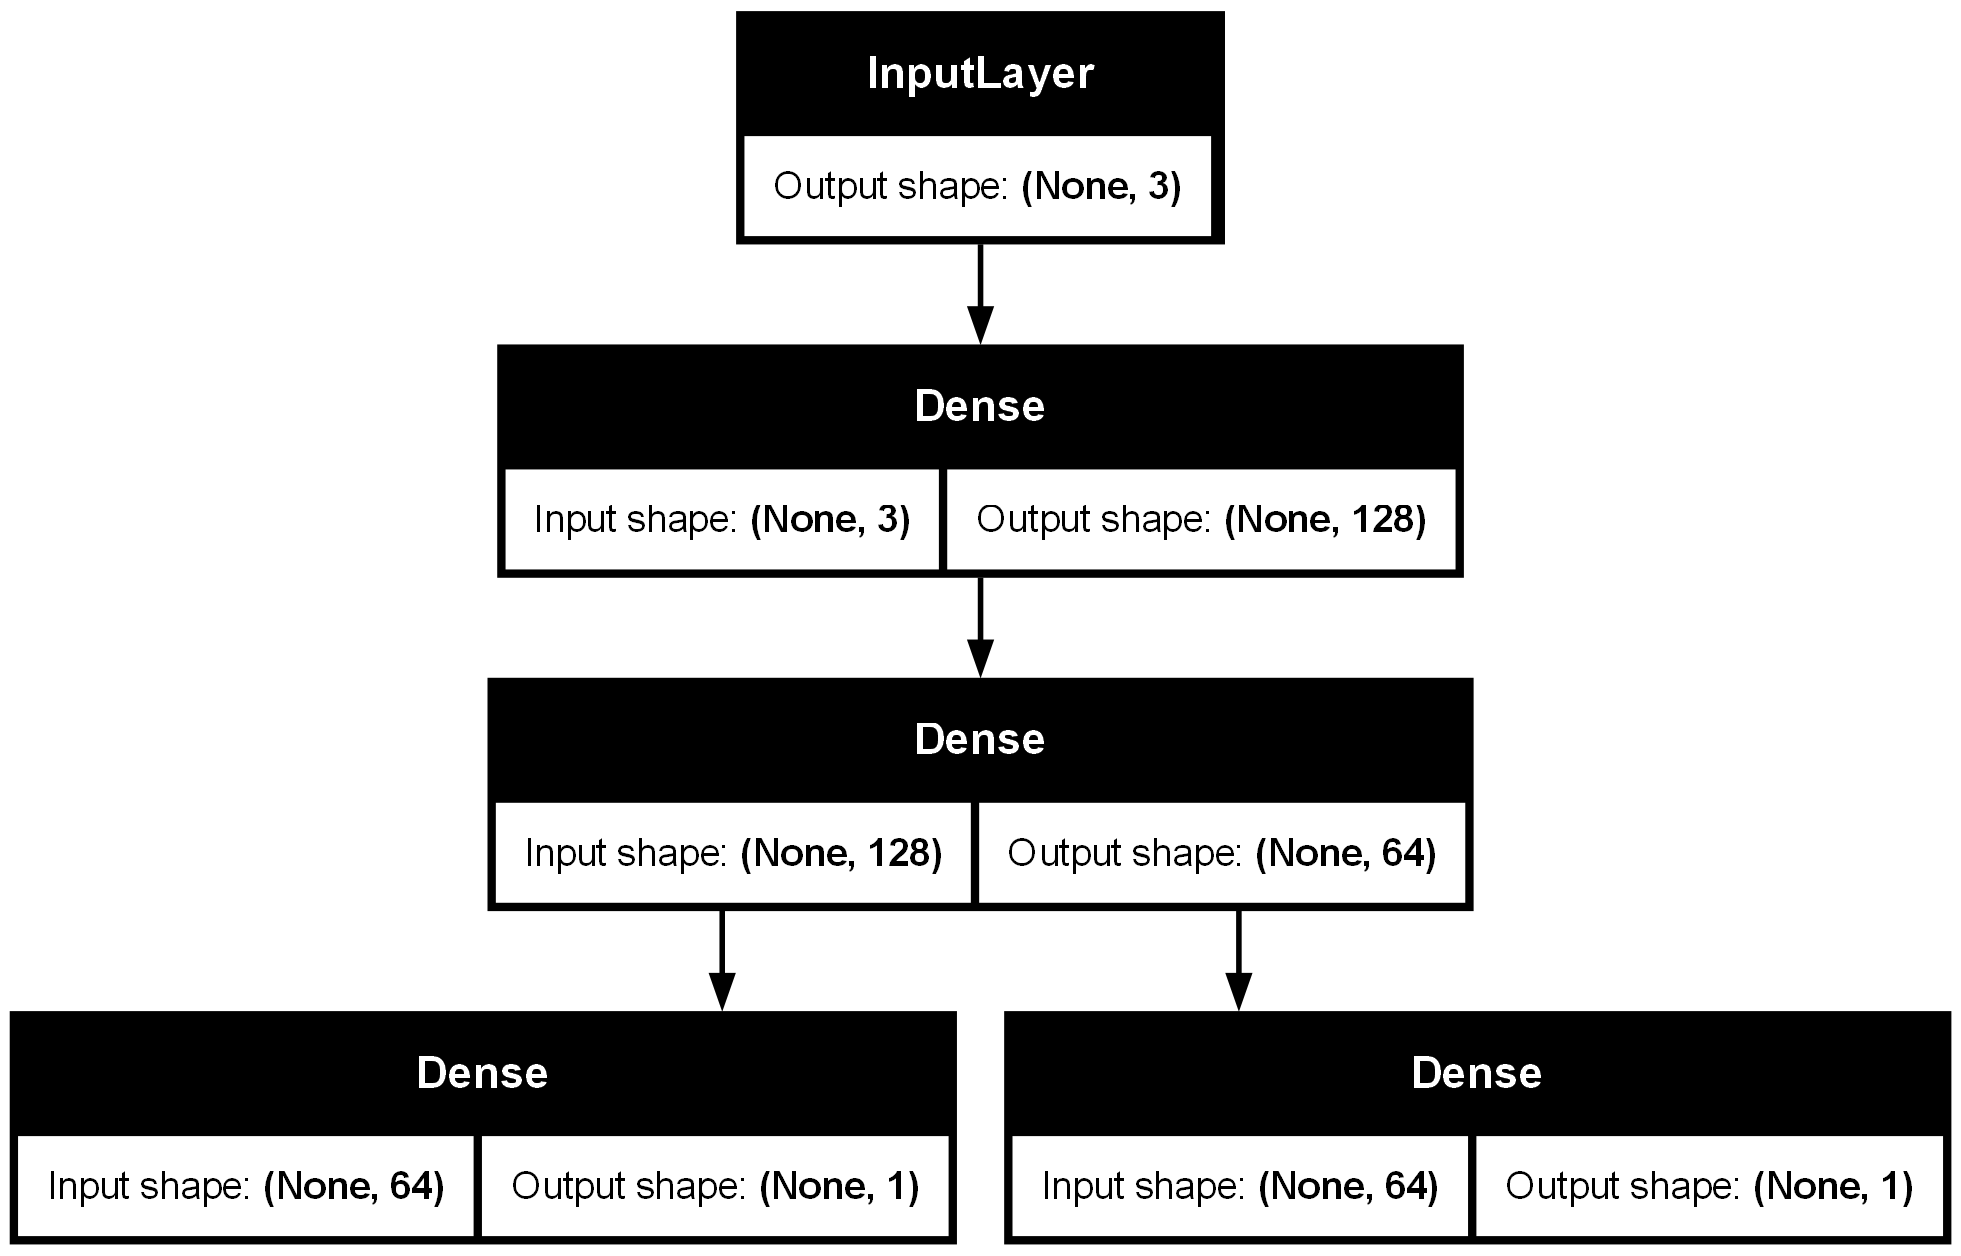

In [6]:

from keras.utils import plot_model
plot_model(model, show_shapes= True)

In [7]:
### Multiple Inputs and outputs
inputA = Input(shape= (128, ))
inputB = Input(shape= (128, ))

## first branch operates on first input
x = Dense(8, activation= 'relu')(inputA)
x1 = Dense(4, activation= 'relu')(x)

##2nd branch operates on second input
y = Dense(64, activation= 'relu')(inputB)
y1 = Dense(32, activation= 'relu')(y)
y2 = Dense(4, activation= 'relu')(y1)

## combine output of two branches
combined = concatenate([x1, y2])

## apply FC layer
z = Dense(2, activation= 'relu')(combined)
z = Dense(1, activation= 'linear')(z)

model = Model(inputs= [inputA, inputB], outputs= z)

model.compile(optimizer= 'adam', loss= 'binary_crossentropy/')


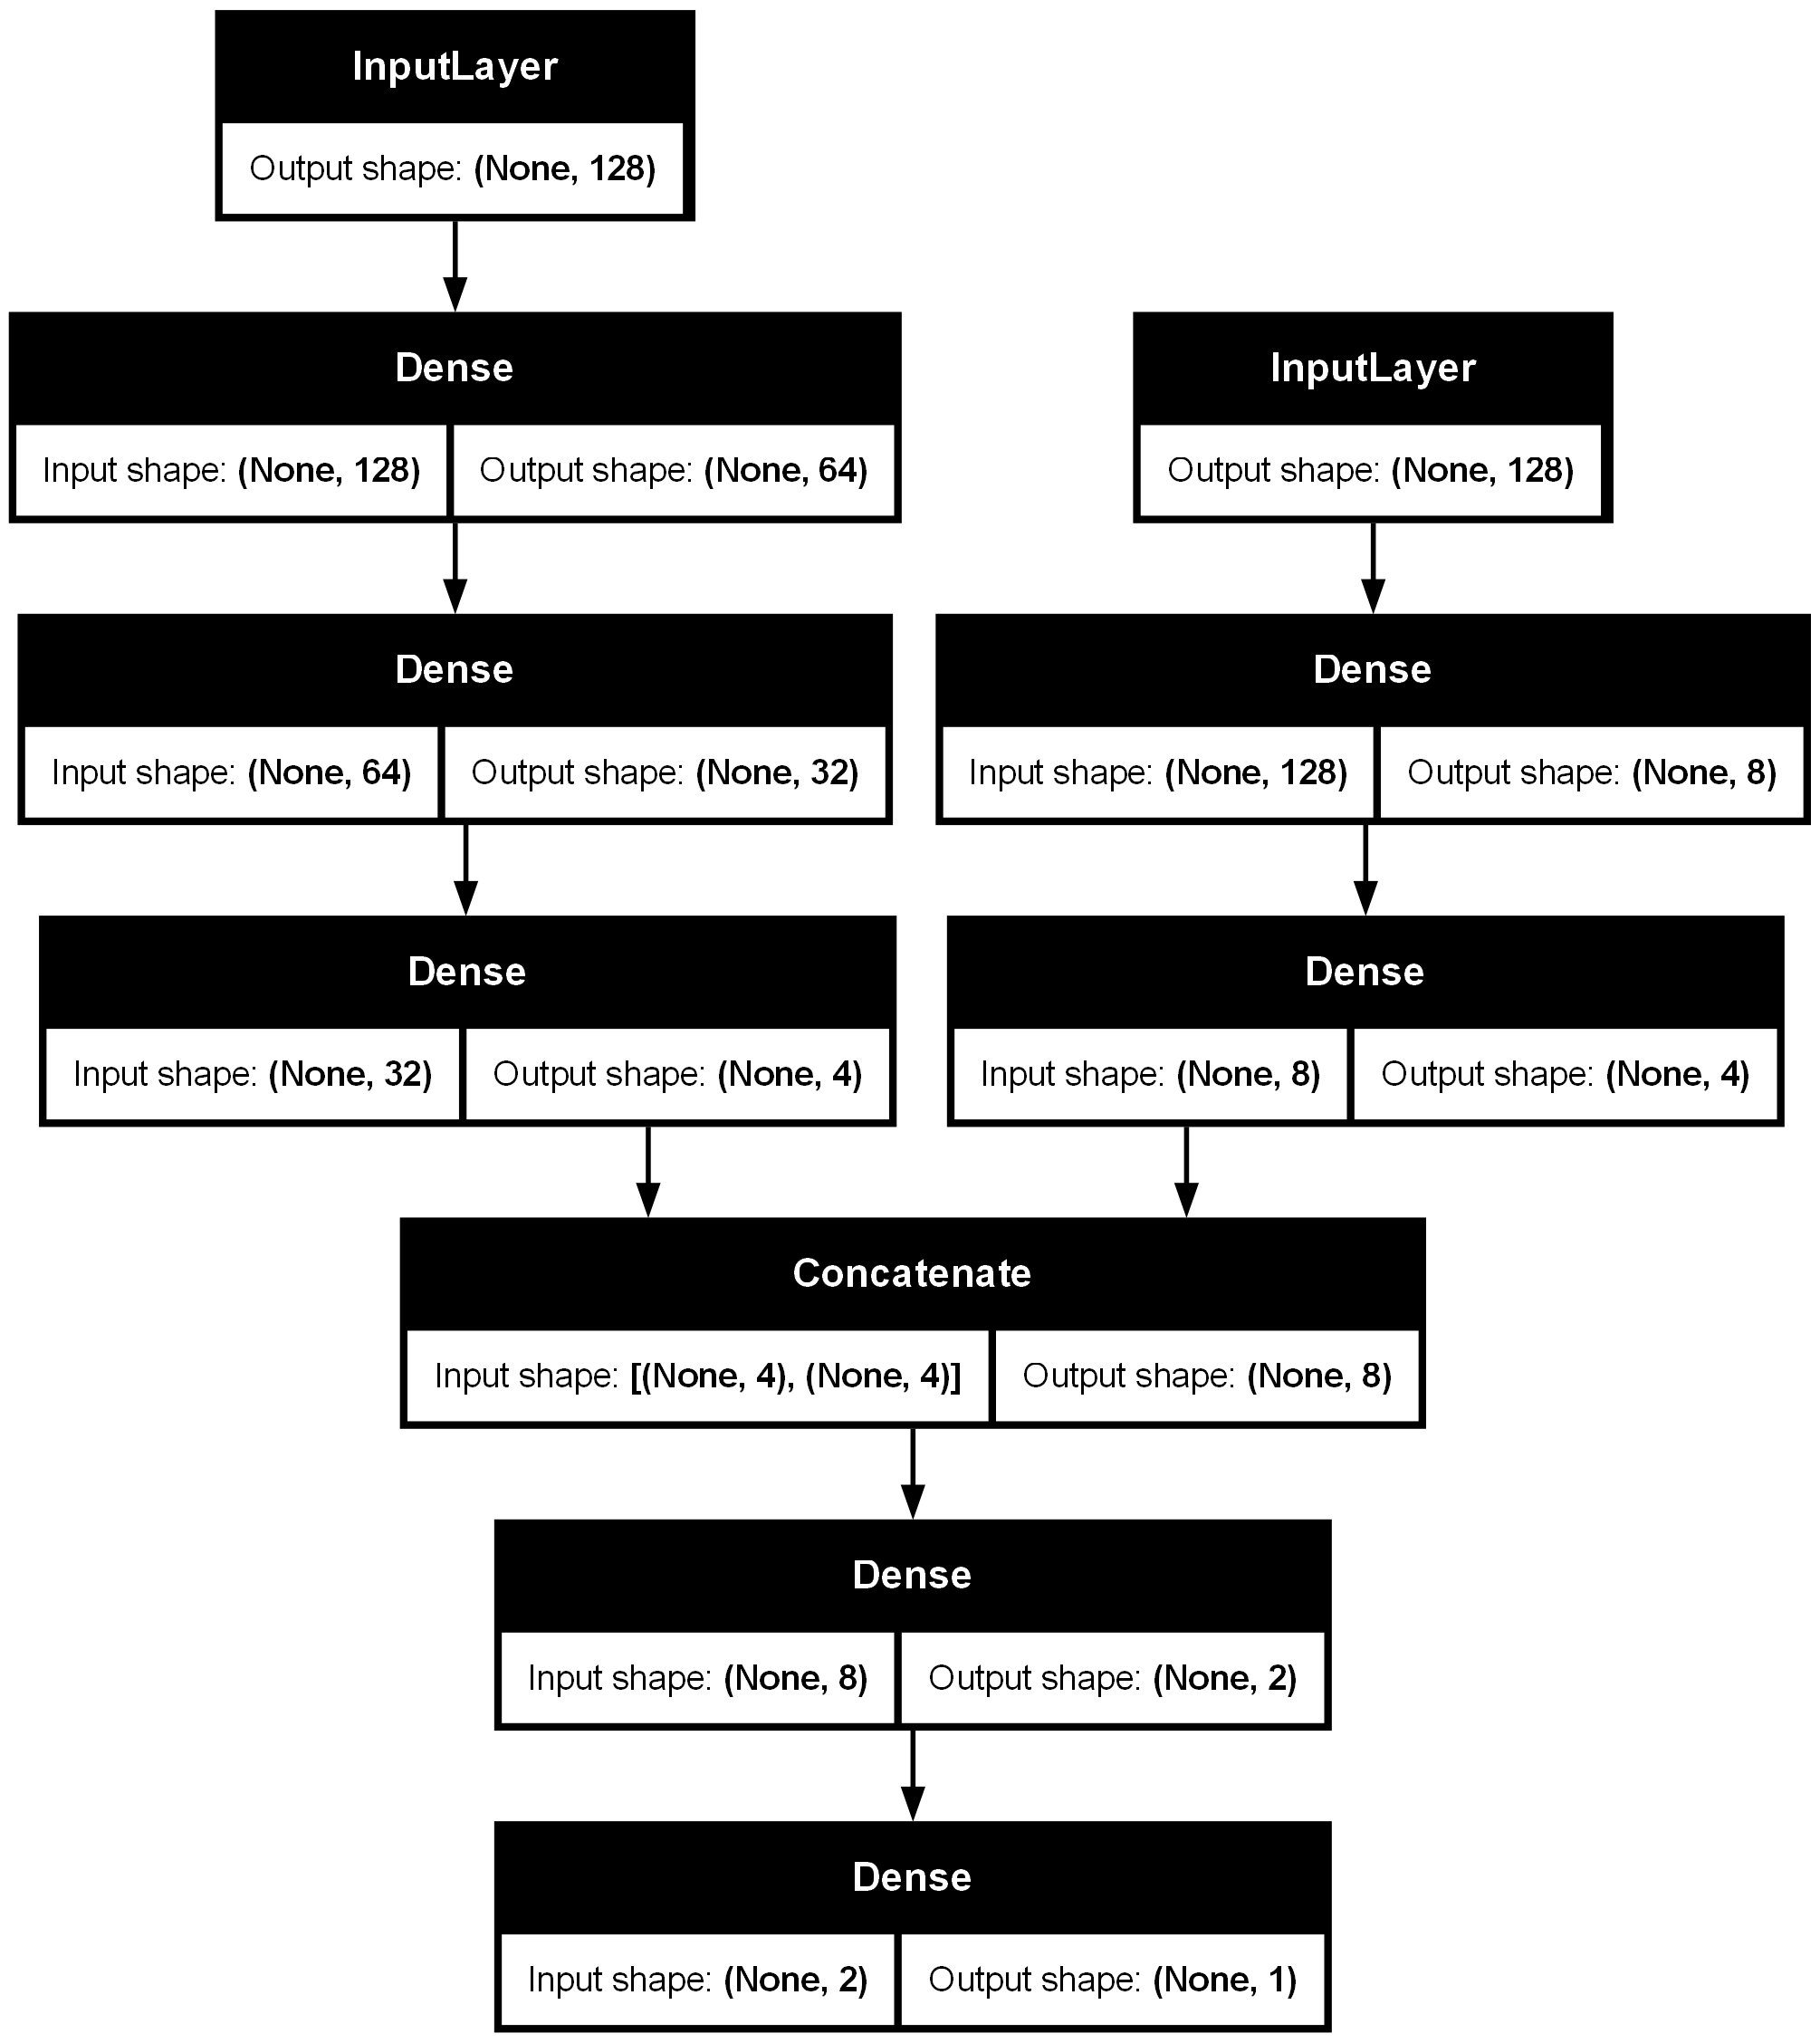

In [8]:
plot_model(model, show_shapes= True)